HERE WE NEED TO PREDICT USED CAR SELLING PRICE ON BASED ON PRAMETERS GIVE AS COLUMNS.WE WILL CALCULATE THE FINAL PRICE ESTIMATION BASED ON THAT DATASET

In [1]:
#!/usr/bin/python
# vim: set fileencoding=utf-8 : 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("car data.csv",sep=",")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape  #print number of rows and column present in dataset

(301, 9)

In [4]:
df.columns #print index of all the columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
df.isnull().values.any()   #if return true means there is some unique value present in dataset

False

In [6]:
df.dtypes  #checking the types of data present in each column

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

so we have categorical features ---> [ Car_Name,Fuel_Type,Seller_Type,Transmission] 

In [7]:
list1=[]
for i in  df.columns:
    if df[i].dtypes=="object":
        list1.append(i)
list1

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

In [8]:
#let's make a column named categorical column which only consist categorical features
cat_df=df[list1]
cat_df.head() #top five rows of cat_df

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual


In [9]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
df=df.drop("Car_Name",axis=1)   #car name makes no importance to the model

In [11]:
cat_df=cat_df.drop("Car_Name",axis=1)

In [12]:
cat_df.head()

,Fuel_Type,Seller_Type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual


In [13]:
df["Current_Year"]=2020

In [14]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [15]:
df["No_of_years"]=df["Current_Year"]-df["Year"]
df=df.drop(["Current_Year","Year"],axis=1)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0
No_of_years,301.0,6.372093,2.891554,2.00,4.0,6.0,8.0,17.0


## Data Visualization

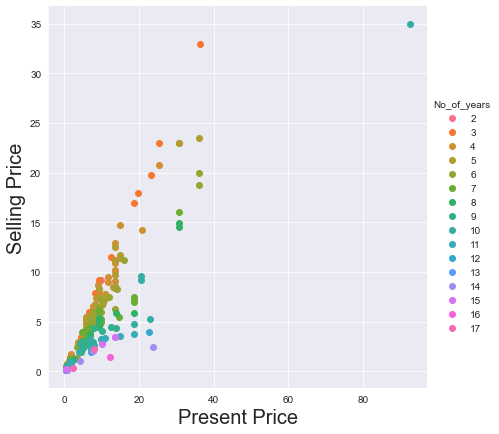

In [17]:
sns.set_style("darkgrid")
sns.FacetGrid(df,hue="No_of_years",height=6).map(plt.scatter,"Present_Price","Selling_Price").add_legend()
plt.xlabel("Present Price",fontsize=20)
plt.ylabel("Selling Price",fontsize=20)
plt.show()

More number of Years you will use your car lesser the amount you will get.

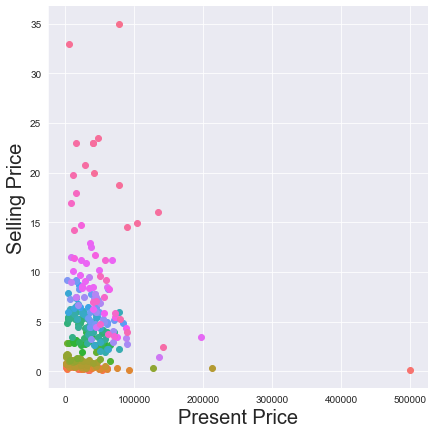

In [18]:
sns.set_style("darkgrid")
sns.FacetGrid(df,hue="Present_Price",height=6).map(plt.scatter,"Kms_Driven","Selling_Price")
plt.xlabel("Present Price",fontsize=20)
plt.ylabel("Selling Price",fontsize=20)
plt.show()

lesser the car would be driven higher will be the cost as we see the graph at max distance ie:- 500000 kms the car's cost is near to Zero or we can say nobody is willing  to pay any amount to those cars

---->  why pair plot ?

We cannot visualize multidimenesional plot in normal system
so by coverting all the feature into pair plot we can visualize each and every dimension of multidimensional data precisely

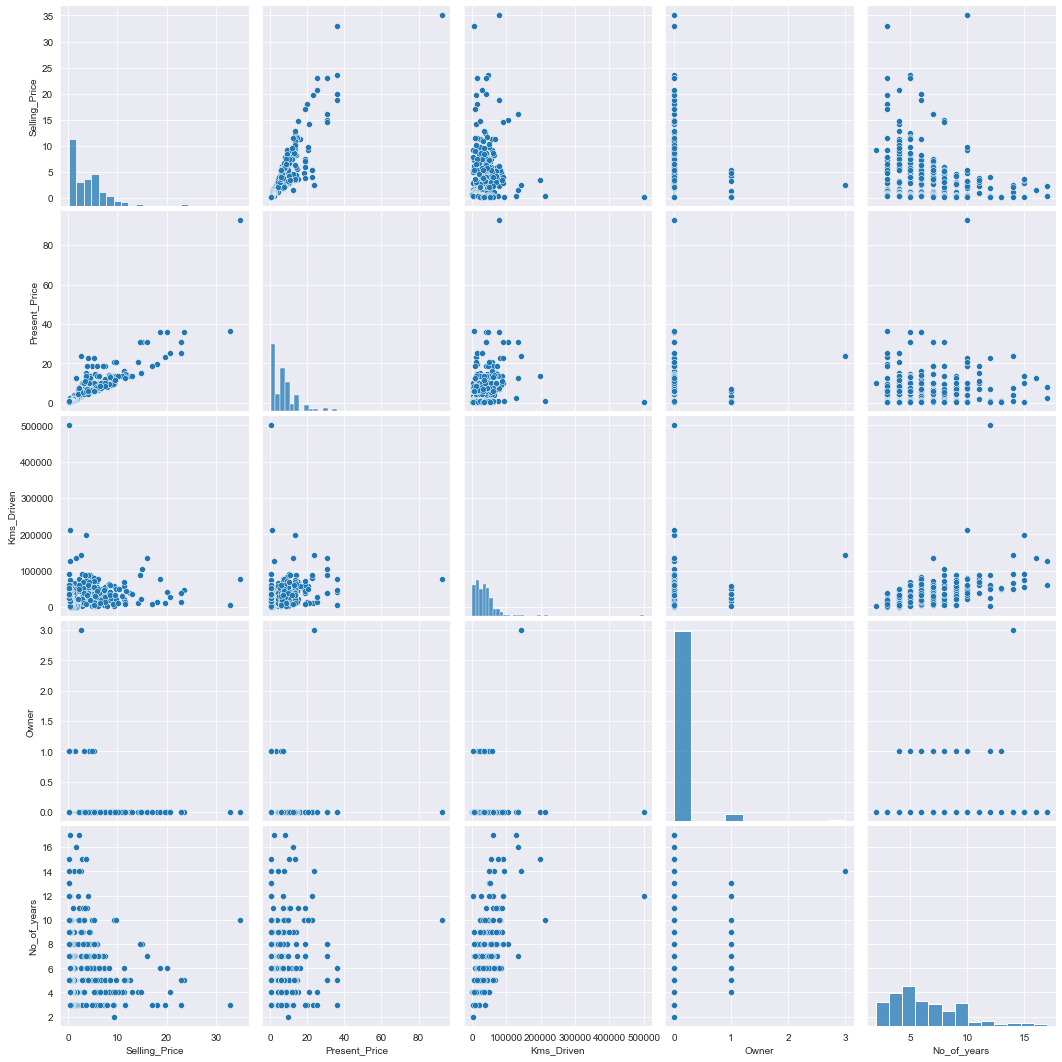

In [19]:
sns.set_style("darkgrid")
sns.pairplot(df,height=3)
plt.show()

As we see there are very less overlapping in dataset is seen so we cannot use knn ,linear regression,svm and because of the dynamic nature of dataset we even cannot use decision tree so we will go with random forest and xgboost.

#### Uni variate analysis :- when analysis involve single variable most predominantly it is used to find the pattern in dataset.let's do some univariate analysis of dataset

c:\programdata\anaconda3\envs\carprice\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until
c:\programdata\anaconda3\envs\carprice\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.


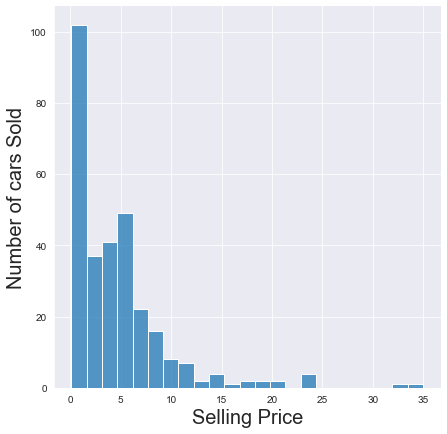

In [20]:
sns.set_style("darkgrid")
sns.FacetGrid(df,height=6).map(sns.histplot,"Selling_Price")
plt.xlabel("Selling Price",Fontsize=20)
plt.ylabel("Number of cars Sold",Fontsize=20)
plt.show()

Most number of car has been sold within a price range of 1-10 lakh  and for a price range of 25 -35 lakh there are negligible amount of customer

c:\programdata\anaconda3\envs\carprice\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until
c:\programdata\anaconda3\envs\carprice\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.


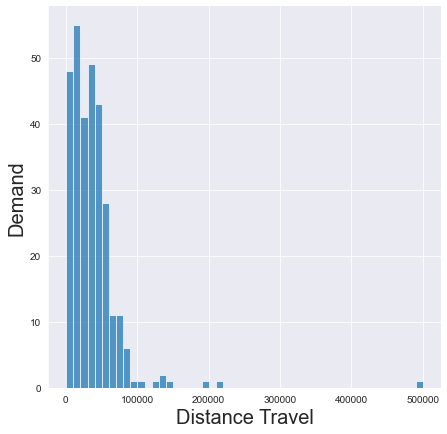

In [21]:
sns.set_style("darkgrid")
sns.FacetGrid(df,height=6).map(sns.histplot,"Kms_Driven")
plt.xlabel("Distance Travel",Fontsize=20)
plt.ylabel("Demand",Fontsize=20)
plt.show()

Demand for those car that has been traveled less distance are in more demand especially if car has traveled distance within a range of 0–5000 kilometre people are more attracted towards them.

#### C.D.F Plot 
It defines how many percentage of variable has value less than and equal to corresponding x-axis. lets' take above example how many percentage of vehicle has selling price less than 15 lakh then we can find this kind of answer by using C.D.F.

In [22]:
df_Selling_Price=df.loc[:,"Selling_Price"]
count,bin_edges=np.histogram(df_Selling_Price,bins=10,density=True)  #density=True gives normalized form od bin_edges and count
print(count)
print(bin_edges)

[0.14279051 0.08662624 0.03236585 0.00856743 0.00571162 0.00475968
 0.00380775 0.         0.         0.00190387]
[ 0.1   3.59  7.08 10.57 14.06 17.55 21.04 24.53 28.02 31.51 35.  ]


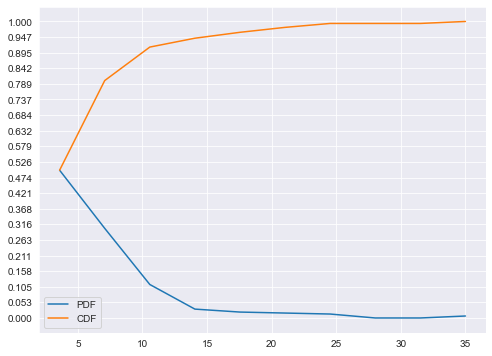

In [23]:
PDF=count/sum(count)
CDF=np.cumsum(PDF)  #cdf is sum of all pdf values
plt.figure(figsize=(8,6))
plt.plot(bin_edges[1:],PDF,label="PDF")
plt.plot(bin_edges[1:],CDF,label="CDF")
plt.yticks(np.linspace(0,1,20))
plt.legend(loc="lower left")
plt.show()

As we can see 94.7%  of cars that are on cardekho has price ≤15 lakh . So one thing is clear that if we want to purchase used car with a price range of 20–25 we won't prefer to go to cardekho.com because there we won't get so many options.

In [24]:
df_Present_Price=df.loc[:,"Present_Price"]
count,bin_edges=np.histogram(df_Present_Price,bins=10,density=True)  #density=True gives normalized form od bin_edges and count
print(count)
print(bin_edges)

[0.08028433 0.02088113 0.00360019 0.00324017 0.         0.
 0.         0.         0.         0.00036002]
[ 0.32   9.548 18.776 28.004 37.232 46.46  55.688 64.916 74.144 83.372
 92.6  ]


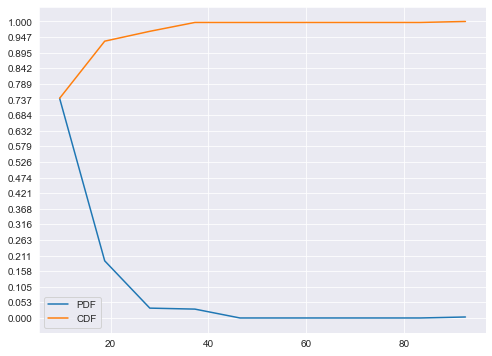

In [25]:
PDF=count/sum(count)
CDF=np.cumsum(PDF)  #cdf is sum of all pdf values
plt.figure(figsize=(8,6))
plt.plot(bin_edges[1:],PDF,label="PDF")
plt.plot(bin_edges[1:],CDF,label="CDF")
plt.yticks(np.linspace(0,1,20))
plt.legend(loc="lower left")
plt.show()

c:\programdata\anaconda3\envs\carprice\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


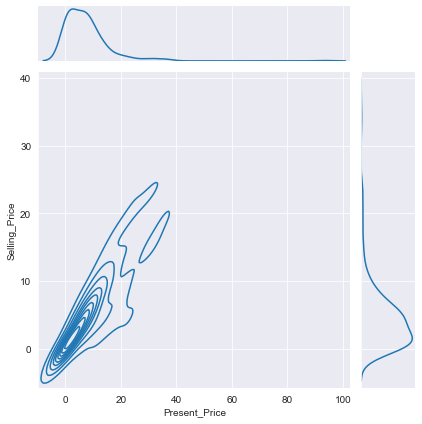

In [26]:
sns.set_style("darkgrid")
sns.jointplot("Present_Price","Selling_Price",data=df,kind="kde")
plt.show()

If we see above graph we can understand that for those vehicle whose original price lie within range of 0–20 lakh they are getting approximately 50% of their money when they sell their car after using certain period of time.

## Feature Engineering

In [27]:
cat_df.head()

,Fuel_Type,Seller_Type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual


In [28]:
dict1={}
for index,col in enumerate(cat_df.columns):
    dict1[col]=cat_df[col].unique().tolist()
dict1  #check how many unique categorical variable each feature consists.

{'Fuel_Type': ['Petrol', 'Diesel', 'CNG'],
 'Seller_Type': ['Dealer', 'Individual'],
 'Transmission': ['Manual', 'Automatic']}

In [29]:
cat_df=pd.get_dummies(cat_df,drop_first=True)

In [30]:
cat_df.head()

,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0,1,0,1
1,1,0,0,1
2,0,1,0,1
3,0,1,0,1
4,1,0,0,1


In [31]:
#Now we will concatenate encoded cat_df with original df
df=df.drop(["Fuel_Type","Seller_Type","Transmission"],axis=1)
df=pd.concat([df,cat_df],axis=1)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [32]:
df.shape

(301, 9)

In [33]:
df.isnull().values.any()

False

Now we have converted all the features into numerical variable.Here we will check correlation between feature but for this dataset we won't do feature selection,Because Feature selection is used when we have large features in a dataset but in this dataset we only check how features in dataset are correlated with each other.

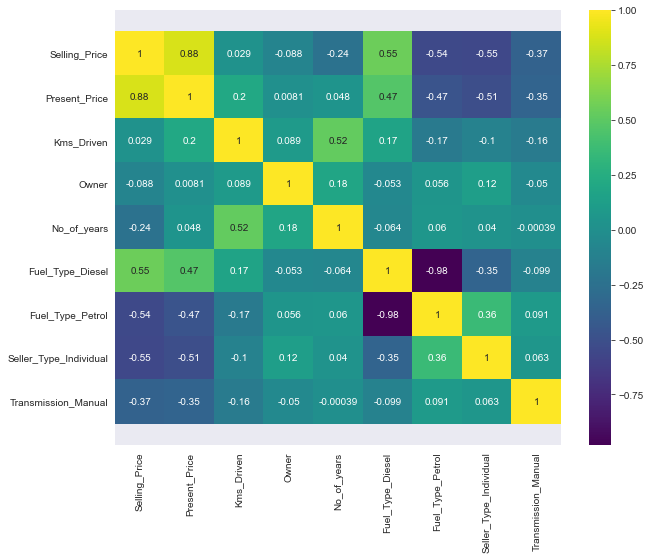

In [34]:
plt.figure(figsize=(10,8))
corr=df.corr()
ax=sns.heatmap(corr,cmap="viridis",annot=True,annot_kws={"size":10})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

## Pre Modeling Step


In [35]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]
print(X.shape)
print(Y.shape)

(301, 8)
(301,)


In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(240, 8)
(240,)
(61, 8)
(61,)


checking  which model will bes best for our dataset  as from pair plot it is clear that we have to take model which do prediction on non linear and combination of categorical and numerical data that are decision tree,random forest and xgboost then we will check which model will have high accuracy based on that we select the model.

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import model_selection
models=[]
models.append(('CART', DecisionTreeRegressor()))
models.append(("KNN",KNeighborsRegressor()))
models.append(("RF", RandomForestRegressor()))
models.append(("XGBOOST", XGBRegressor()))
names=[]
result=[]
for name,model in models:
    k_fold=model_selection.KFold(n_splits=10,shuffle=True,random_state=7)
    score=model_selection.cross_val_score(model,X_train,Y_train,cv=k_fold,scoring="r2")
    result.append(score)
    names.append(name)
    print(name,score.mean(),score.std())

CART 0.853310461012646 0.13278625178737416
KNN -0.378568879077546 0.47647812753786817
RF 0.9042929156093538 0.12156480829550835
XGBOOST 0.9133089417590344 0.08345678456039288


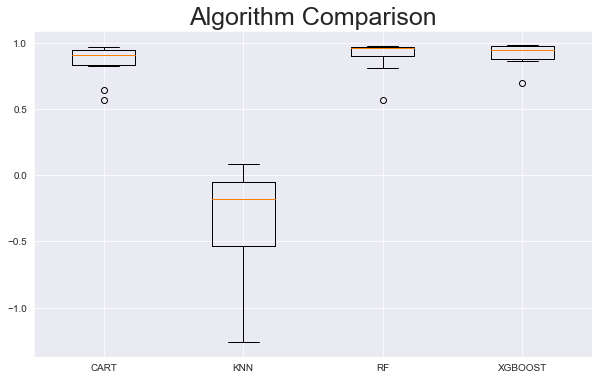

In [38]:
fig = plt.figure(figsize=(10,6))
plt.boxplot(result,labels=names)
plt.title('Algorithm Comparison',fontsize=25)
plt.show()

As we see above accuracy score result we can say that XGBoost  gives better accuracy with very low standard deviation hence we should go with Xgboost.

checking important features present in dataset in ascending order

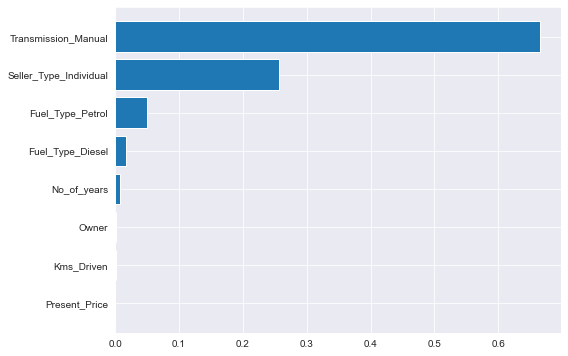

In [39]:
plt.figure(figsize=(8,6))
model=XGBRegressor()
model.fit(X,Y)
importance=np.sort(model.feature_importances_)
plt.barh(X.columns,importance)
plt.show()

Here Transmission_manual,seller_Type_individual,Fuel_Type_petrol,Fuel_Type_Diesel,No_of_Years  make most impact to output prediction.

In [40]:
#Applying hyper parameter tunining to get best result
from sklearn.model_selection import GridSearchCV
param_grid={"learning_rate":[0.05,0.10,0.20,0.30,0.50],
            "max_depth":[3,5,6,8,10,12,15],
            "min_child_weight":[1,3,5,6,7,8],
            "gamma":[0.1,0.2,0.3,0.5]
           }

In [41]:
from sklearn.model_selection import RandomizedSearchCV
xgb=XGBRegressor()
rand_cv=RandomizedSearchCV(estimator=xgb,param_distributions=param_grid,cv=10)
rand_cv.fit(X_train,Y_train)


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                      

In [42]:
rand_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
rand_cv.best_params_

{'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0.1}

In [44]:
from sklearn.metrics import r2_score 
xgb_ran=XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
importance_type='gain', interaction_constraints='',learning_rate=0.300000012, max_delta_step=0, max_depth=3,
min_child_weight=1, missing=np.nan, monotone_constraints='()',n_estimators=150, n_jobs=2, num_parallel_tree=1, random_state=0,reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
tree_method='exact', validate_parameters=1, verbosity=None)
xgb_ran.fit(X_train,Y_train)
Y_train_predicted=xgb_ran.predict(X_train)
Y_test_predicted=xgb_ran.predict(X_test)
print("Train set accuracy: ",r2_score(Y_train,Y_train_predicted))
print("Test set accuracy : ",r2_score(Y_test,Y_test_predicted))

Train set accuracy:  0.9996018036686317
Test set accuracy :  0.9426241328822219


In [45]:
Result=pd.DataFrame({"Actual":Y_test,"Predicted":Y_test_predicted})
Result.head(10)


,Actual,Predicted
285,7.40,7.300672
248,4.00,3.283252
150,0.50,0.599769
217,3.15,3.283878
107,1.25,1.013086
206,5.75,5.109740
132,0.75,0.846470
73,2.65,2.790905
288,8.40,9.463024
157,0.48,0.607836


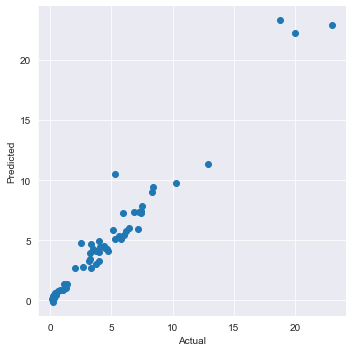

In [46]:
#checking how the variation of original value and predicted values happens
sns.set_style("darkgrid")
sns.FacetGrid(Result,height=5).map(plt.scatter,"Actual","Predicted")
plt.show()

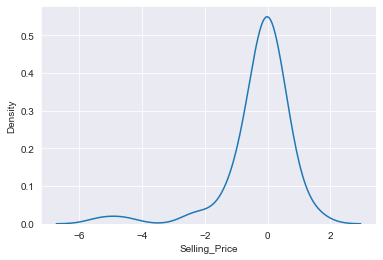

In [47]:
sns.set_style("darkgrid")
sns.kdeplot(Y_test-Y_test_predicted)
plt.show()

saving a model in serialized format;
later when we have to do prediction we will just load the file and make prediction using that serialized  file we don't need to again make a new  model for prediction on new test data.

In [50]:
#coding: utf-8 
import pickle
file=open("car_price.pkl","wb")
pickle.dump(xgb_ran,file)